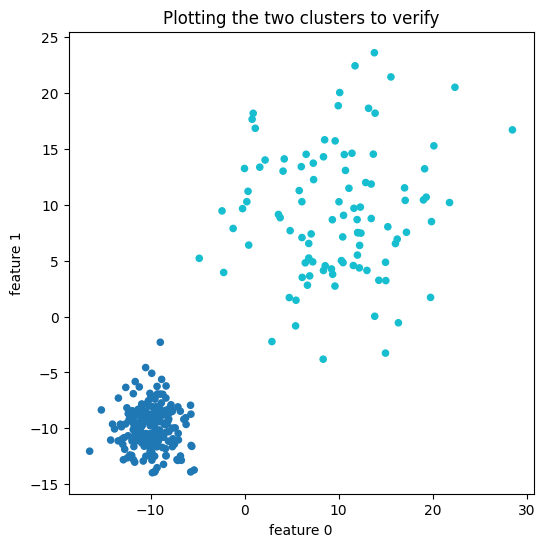

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples = [200, 100],
    centers = [(-10, -10), (10, 10)],
    cluster_std = [2, 6],
    n_features = 2,
    random_state = 42
)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=20)
plt.title("Plotting the two clusters to verify")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

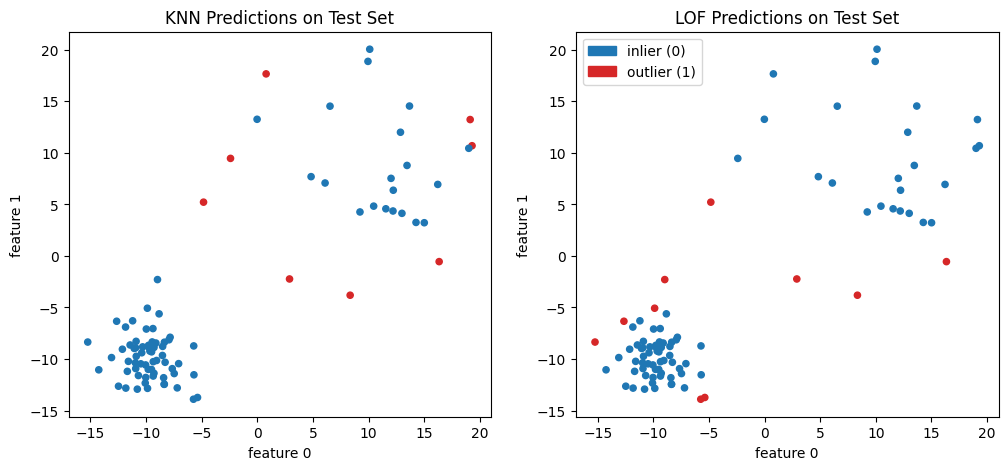

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, Normalize
import matplotlib.patches as mpatches
from pyod.models.knn import KNN
from pyod.models.lof import LOF


contamination = 0.07
neighbors = 12
# neighbor params tried: 3, 5, 10, 12, 15, 17, 20, 25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNN(contamination=contamination, n_neighbors=neighbors)
lof = LOF(contamination=contamination, n_neighbors=neighbors)

knn.fit(X_train)
lof.fit(X_train)

y_train_pred_knn = knn.predict(X_train)
y_train_pred_lof = lof.predict(X_train)

y_test_pred_knn = knn.predict(X_test)
y_test_pred_lof = lof.predict(X_test)

norm = Normalize(vmin=0, vmax=1)
cmap = ListedColormap(['tab:blue', 'tab:red'])
inlier_patch = mpatches.Patch(color='tab:blue', label='inlier (0)')
outlier_patch = mpatches.Patch(color='tab:red', label='outlier (1)')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_knn, cmap=cmap, norm =norm, s=20)
plt.title("KNN Predictions on Test Set")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_lof, cmap=cmap, norm=norm, s=20)
plt.title("LOF Predictions on Test Set")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(handles=[inlier_patch, outlier_patch])
plt.show()


In [ ]:
### Wanted to see balanced accuracy calculation, so I added it (same method
# as the last exercise) ###

import numpy as np

def confusion_stats(y_true, y_pred):
    y_true = np.array(y_true).ravel()
    y_pred = np.array(y_pred).ravel()
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def metrics_from_confusion(TP, TN, FP, FN):
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
    balanced_accuracy = 0.5 * (recall + specificity)
    return balanced_accuracy

TP_train_knn, TN_train_knn, FP_train_knn, FN_train_knn = confusion_stats(y_train, y_train_pred_knn)
TP_test_knn, TN_test_knn, FP_test_knn, FN_test_knn = confusion_stats(y_test, y_test_pred_knn)

TP_train_lof, TN_train_lof, FP_train_lof, FN_train_lof = confusion_stats(y_train, y_train_pred_lof)
TP_test_lof, TN_test_lof, FP_test_lof, FN_test_lof = confusion_stats(y_test, y_test_pred_lof)

balanced_accuracy_train_knn = metrics_from_confusion(TP_train_knn, TN_train_knn, FP_train_knn, FN_train_knn)
balanced_accuracy_test_knn = metrics_from_confusion(TP_test_knn, TN_test_knn, FP_test_knn, FN_test_knn)

print(f"Balanced accuracy (train): {balanced_accuracy_train_knn:.4f}")
print(f"Balanced accuracy (test): {balanced_accuracy_test_knn:.4f}")

balanced_accuracy_train_lof = metrics_from_confusion(TP_train_lof, TN_train_lof, FP_train_lof, FN_train_lof)
balanced_accuracy_test_lof = metrics_from_confusion(TP_test_lof, TN_test_lof, FP_test_lof, FN_test_lof)

print(f"Balanced accuracy (train): {balanced_accuracy_train_lof:.4f}")
print(f"Balanced accuracy (test): {balanced_accuracy_test_lof:.4f}")

Balanced accuracy (train): 0.5972
Balanced accuracy (test): 0.6429
Balanced accuracy (train): 0.5027
Balanced accuracy (test): 0.5230
